# A joint model CAR (model 1) 
# With Crossvalidation
## Two independent processes
 $$ [P , S ] = [P ] [ S ] $$

In [13]:
## Import code:
setwd('/apps/external_plugins/biospytial_rwrapper/biospytial.rwrapper/R/')

In [88]:
rm(list=ls())                                                                                     
source("init_data.R")                                                                             
# load the building function                                                                      
source("joint.binomial.bymCARModel1.R")
## Fix the burnin and sample to be consistent with the other models
#n.sample = 10000                                                                                  
#burnin=10000                                                                                      
#postburnin = burnin +1000                                                                         

n.sample = 1000                                                                                 
burnin=100                                                                                      
postburnin = burnin +1000                                                                         


thin = 1                                                                                          
verbose = TRUE                           

## Make ROC curve
library(pROC)
library('caret')
#trains = createFolds(y = DataFrame$species, k=7, returnTrain = TRUE)
validate = createFolds(y = DataFrame$species, k=7, returnTrain = FALSE)

DataFrame$presences <- DataFrame$species



Cross validation of CAR models is not straight forward due to its spatial structure (lattice). 
The approach for this would be with data augmentation.
removing the value for validate.data and change it o NA.

After the model, I'll extract the resulting probability and perform a simple ROC curve.


In [89]:
l <- list()
i = 1
DataFrame$predicted_values_CV <- NA
for (fold in validate) {
    
    observed.presences <- DataFrame$species[fold]
    ## Substitue by NA
    DataFrame$species[fold] <- NA
    results  <- joint.binomial.bymCARModel1(formula_S = formula_sample, 
                                        formula_P = formula_presence,
                                        n.sample=n.sample,
                                        data = DataFrame,
                                        burnin=burnin,
                                        postburnin=postburnin,
                                        thin=thin,
                                        verbose=TRUE) 

    DataFrame$species <- DataFrame$presences
    ## Return original values
    DataFrame$predicted_values_CV[fold] <- results$fitted.values[fold]
    predicted.probability = results$fitted.values[fold]
    pROC_obj <- roc(observed.presences,predicted.probability)

    l[[i]] <- pROC_obj
    i = i + 1
}

Setting up the model.
Performing burnin period for Sample Effort Model 
  |======================================================================| 100%
Summarising results.
Finished in  16 seconds.
Setting up the model.
Performing burnin period for Presence model 
  |======================================================================| 100%
Summarising results.
Finished in  15.7 seconds.
Sampling from the joint model 1000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
[1] "Compiling summary for S process"
[1] "Compiling summary for the P process"


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Setting up the model.
Performing burnin period for Sample Effort Model 
  |======================================================================| 100%
Summarising results.
Finished in  15.2 seconds.
Setting up the model.
Performing burnin period for Presence model 
  |======================================================================| 100%
Summarising results.
Finished in  15.4 seconds.
Sampling from the joint model 1000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
[1] "Compiling summary for S process"
[1] "Compiling summary for the P process"


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Setting up the model.
Performing burnin period for Sample Effort Model 
  |======================================================================| 100%
Summarising results.
Finished in  15.8 seconds.
Setting up the model.
Performing burnin period for Presence model 
  |======================================================================| 100%
Summarising results.
Finished in  15.1 seconds.
Sampling from the joint model 1000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
[1] "Compiling summary for S process"
[1] "Compiling summary for the P process"


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Setting up the model.
Performing burnin period for Sample Effort Model 
  |======================================================================| 100%
Summarising results.
Finished in  15.9 seconds.
Setting up the model.
Performing burnin period for Presence model 
  |======================================================================| 100%
Summarising results.
Finished in  15.3 seconds.
Sampling from the joint model 1000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
[1] "Compiling summary for S process"
[1] "Compiling summary for the P process"


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Setting up the model.
Performing burnin period for Sample Effort Model 
  |======================================================================| 100%
Summarising results.
Finished in  16 seconds.
Setting up the model.
Performing burnin period for Presence model 
  |======================================================================| 100%
Summarising results.
Finished in  15.4 seconds.
Sampling from the joint model 1000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
[1] "Compiling summary for S process"
[1] "Compiling summary for the P process"


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Setting up the model.
Performing burnin period for Sample Effort Model 
  |======================================================================| 100%
Summarising results.
Finished in  15.5 seconds.
Setting up the model.
Performing burnin period for Presence model 
  |======================================================================| 100%
Summarising results.
Finished in  15.5 seconds.
Sampling from the joint model 1000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
[1] "Compiling summary for S process"
[1] "Compiling summary for the P process"


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Setting up the model.
Performing burnin period for Sample Effort Model 
  |======================================================================| 100%
Summarising results.
Finished in  15.8 seconds.
Setting up the model.
Performing burnin period for Presence model 
  |======================================================================| 100%
Summarising results.
Finished in  15.8 seconds.
Sampling from the joint model 1000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
[1] "Compiling summary for S process"
[1] "Compiling summary for the P process"


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Setting levels: control = 0, case = 1
Setting direction: controls < cases
Warning message in plot.ci.se(sens.ci, type = "shape", col = "lightblue"):
“Low definition shape.”

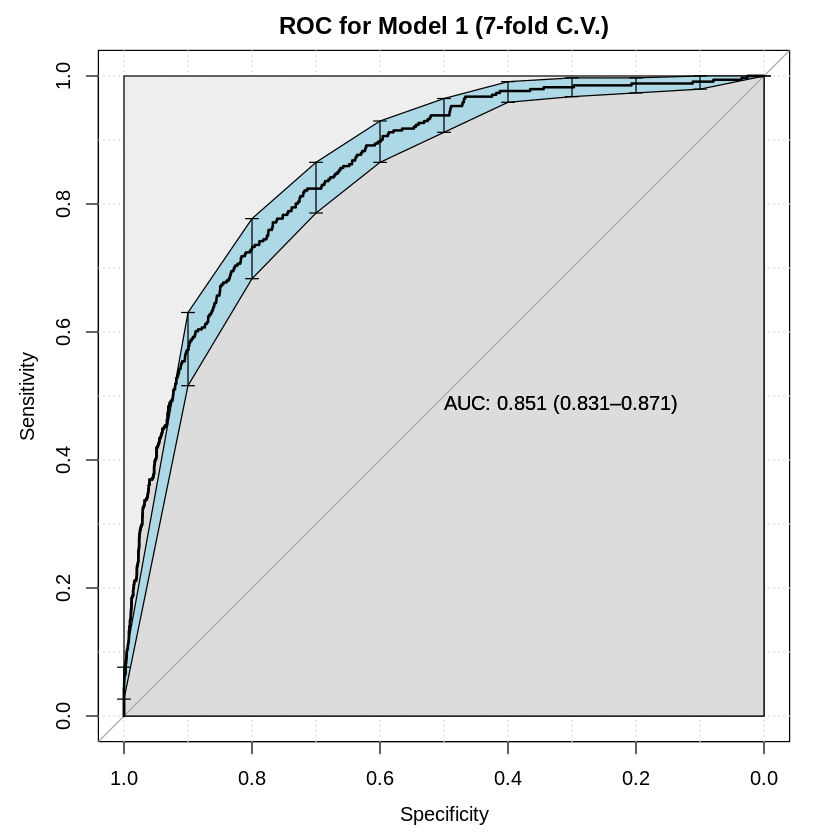

In [95]:
pROC_obj <- roc(DataFrame$presences,DataFrame$predicted_values_CV,
               smoothed= TRUE,
               ci = TRUE, ci.alpha=0.9, stratified=FALSE,
               plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
               print.auc=TRUE, show.thres=TRUE,main='ROC for Model 1 (7-fold C.V.)')
sens.ci <- ci.se(pROC_obj)
plot(sens.ci,type="shape",col="lightblue")
plot(sens.ci, type="bars")
#title("Hola Cagaya")


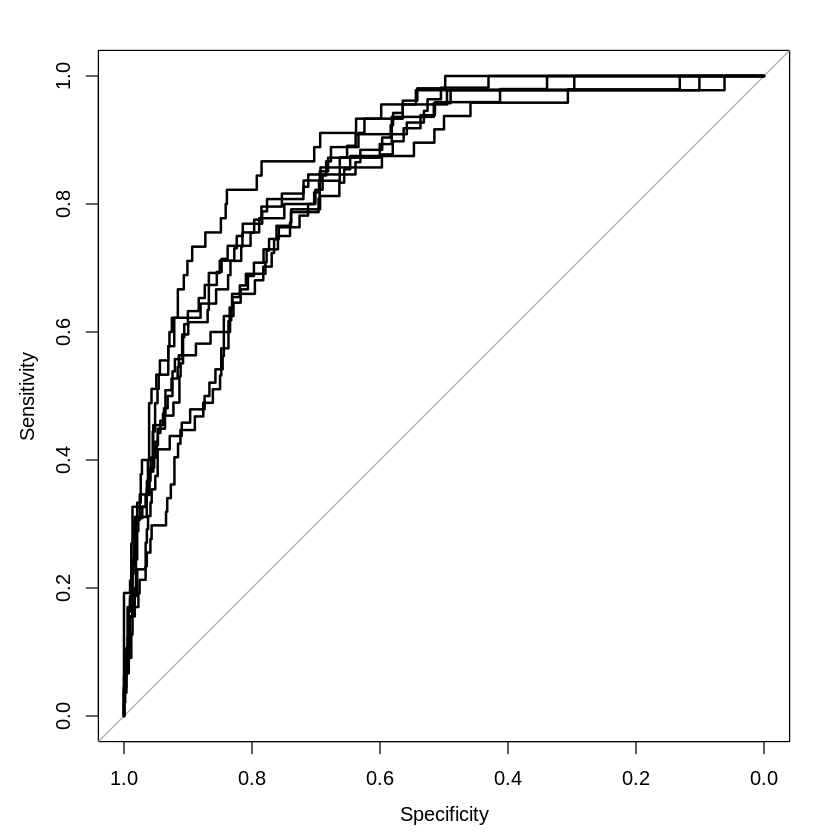

In [87]:
plot(l[[1]])
for ( i in seq(2,length(l))) {
 lines(l[[i]])
}

In [71]:
results  <- joint.binomial.bymCARModel1(formula_S = formula_sample, 
                                        formula_P = formula_presence,
                                        n.sample=n.sample,
                                        data = DataFrame,
                                        burnin=burnin,
                                        postburnin=postburnin,
                                        thin=thin,
                                        verbose=TRUE)

Setting up the model.
Performing burnin period for Sample Effort Model 
  |======================================================================| 100%
Summarising results.
Finished in  90.8 seconds.
Setting up the model.
Performing burnin period for Presence model 
  |======================================================================| 100%
Summarising results.
Finished in  88.6 seconds.
Sampling from the joint model 10000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
[1] "Compiling summary for S process"
[1] "Compiling summary for the P process"


Setting levels: control = 0, case = 1
Setting direction: controls < cases
Warning message in plot.ci.se(sens.ci, type = "shape", col = "lightblue"):
“Low definition shape.”

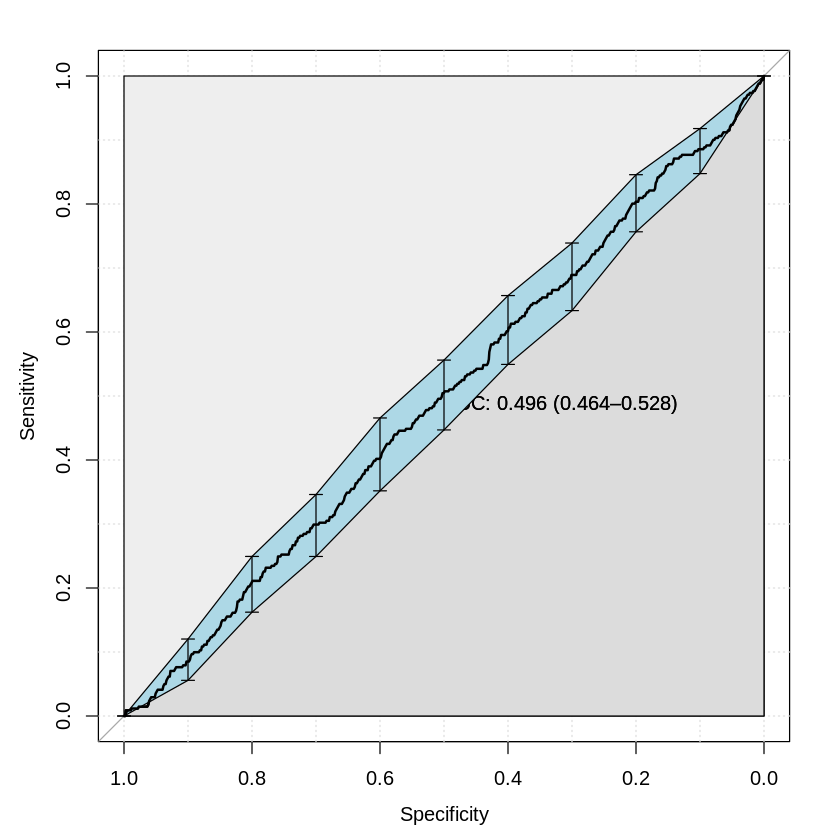

In [72]:
pROC_obj <- roc(DataFrame$presences,DataFrame$predicted_values_CV,
               smoothed= TRUE,
               ci = TRUE, ci.alpha=0.9, stratified=FALSE,
               plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
               print.auc=TRUE, show.thres=TRUE)
sens.ci <- ci.se(pROC_obj)
plot(sens.ci,type="shape",col="lightblue")
plot(sens.ci, type="bars")

In [11]:
predicted.probability = results$fitted.values[validate$Fold1]

Setting levels: control = 0, case = 1
Setting direction: controls < cases
Warning message in plot.ci.se(sens.ci, type = "shape", col = "lightblue"):
“Low definition shape.”

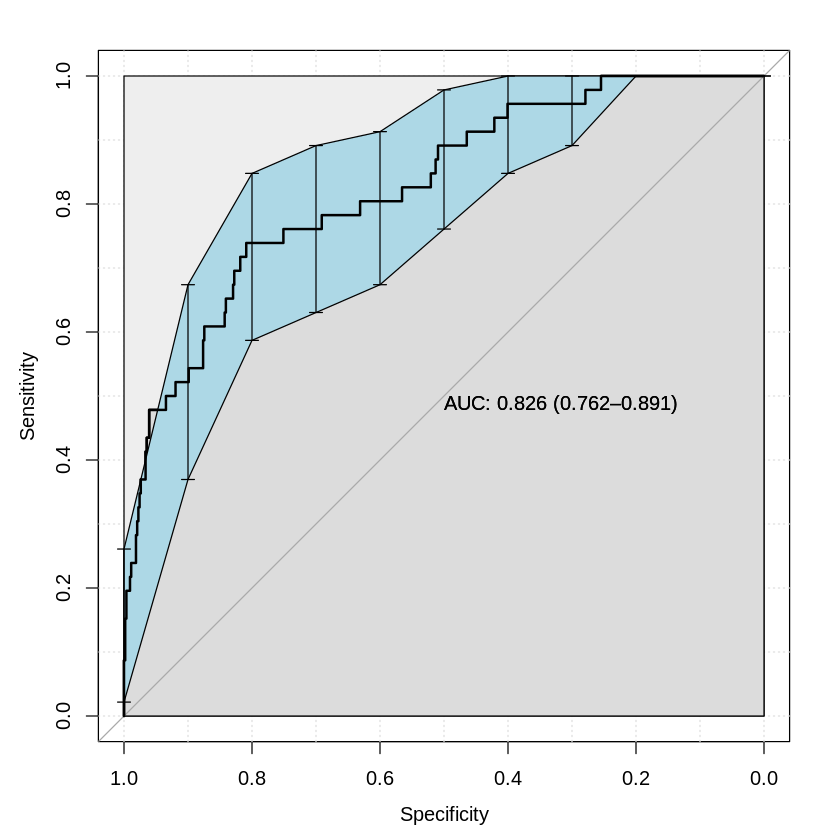

In [24]:
pROC_obj <- roc(observed.presences,predicted.probability,
               smoothed= TRUE,
               ci = TRUE, ci.alpha=0.9, stratified=FALSE,
               plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
               print.auc=TRUE, show.thres=TRUE)
sens.ci <- ci.se(pROC_obj)
plot(sens.ci,type="shape",col="lightblue")
plot(sens.ci, type="bars")

ERROR: Error in segments(sp, x[n, 1], sp, x[n, 3], col = col, ...): plot.new has not been called yet


In [21]:
plot(sens.ci,type="shape",col="lightblue")

Warning message in plot.ci.se(sens.ci, type = "shape", col = "lightblue"):
“Low definition shape.”

ERROR: Error in polygon(c(0, attr(x, "specificities"), 1 * ifelse(attr(x, "roc")$percent, : plot.new has not been called yet


In [27]:
## Partition de dataframes, however maybe this is not needed
trains.data <- lapply(trains,function(set) DataFrame[set,])
validate.data <- lapply(trains,function(set) DataFrame[-set,])
    

In [26]:
validate.data$Fold1

X,LUCA,Plantae,Pinophyta,Abies,cellids,Disttoroadm,Elevationm,MaxTempm,MeanTempm,⋯,Latitude,wwfmhtnum,wwfmhtnam,covid,name,covid2,tipos,geometry,sample,species
3609,1,1,0,0,233547,2556,1133,2332,2330,⋯,21.46739,1,Tropical and Subtropical Moist Broadleaf Forests,114294,VEGETACIÓN SECUNDARIA ARBÓREA DE SELVA MEDIANA SUBPERENNIFOLIA,8020,Selva Alta Perennifolia,POINT (-97.602563416 21.467389801),1,0
2057,1,0,0,0,233552,1120,1409,2150,2274,⋯,21.46926,14,Mangroves,42560,PASTIZAL CULTIVADO,7812,Pastizal Cultivado,POINT (-97.3644320579 21.469261601),0,0
3093,1,0,0,0,233752,2490,3244,2405,2423,⋯,21.41839,14,Mangroves,42818,PASTIZAL CULTIVADO,7291,Pastizal Cultivado,POINT (-97.553563416 21.418389801),0,0
2929,1,0,0,0,233754,3369,2783,2141,2274,⋯,21.41839,14,Mangroves,87983,MANGLAR,8048,Manglar,POINT (-97.455563416 21.418389801),0,0
1570,0,0,0,0,233963,12,1406,2252,2277,⋯,21.37262,14,Mangroves,42560,PASTIZAL CULTIVADO,7812,Pastizal Cultivado,POINT (-97.41159098030001 21.3726158808),NA,0
2897,1,1,0,0,234172,1755,1598,2233,2110,⋯,21.32039,1,Tropical and Subtropical Moist Broadleaf Forests,42400,PASTIZAL CULTIVADO,7291,Pastizal Cultivado,POINT (-97.79856341599999 21.320389801),1,0
1377,1,1,0,0,234173,2248,449,2446,2255,⋯,21.32039,1,Tropical and Subtropical Moist Broadleaf Forests,42818,PASTIZAL CULTIVADO,7291,Pastizal Cultivado,POINT (-97.749563416 21.320389801),1,0
2832,1,1,0,0,234386,1071,319,2900,2449,⋯,21.27139,1,Tropical and Subtropical Moist Broadleaf Forests,42818,PASTIZAL CULTIVADO,7291,Pastizal Cultivado,POINT (-98.141563416 21.271389801),1,0
1293,1,1,0,0,234391,2067,3227,2005,1867,⋯,21.27139,1,Tropical and Subtropical Moist Broadleaf Forests,106730,VEGETACIÓN SECUNDARIA ARBÓREA DE SELVA ALTA SUBPERENNIFOLIA,7291,Pastizal Cultivado,POINT (-97.89656341600001 21.271389801),1,0
2911,1,1,0,0,234399,3022,886,2588,2418,⋯,21.27139,1,Tropical and Subtropical Moist Broadleaf Forests,42818,PASTIZAL CULTIVADO,7291,Pastizal Cultivado,POINT (-97.504563416 21.271389801),1,0


In [12]:
## Make a map to partition dataset
train.data <- DataFrame[trains,]

[1] 4060   27

In [3]:
results$S$summary.results

,Median,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
(Intercept),10.5346,7.0995,12.0097,10000,53.7,2.3,-31.0
Disttoroadm,-0.0002,-0.0004,-0.0001,10000,53.7,1083.0,-1.9
Populationm,0.0000,-0.0001,0.0001,10000,53.7,1565.5,-0.3
tau2,6.1312,3.7996,9.4912,10000,100.0,15.4,-0.5
sigma2,0.2387,0.0547,0.6632,10000,100.0,4.6,4.3


In [4]:
results$P$summary.results

,Median,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
(Intercept),6.8712,5.4379,8.2628,10000,54.3,6.7,0.9
Disttoroadm,-0.0002,-0.0003,-0.0001,10000,54.3,1260.8,-1.1
Populationm,0.0000,-0.0001,0.0001,10000,54.3,1347.8,0.1
tau2,5.3452,2.3637,8.1601,10000,100.0,8.5,1.2
sigma2,0.0242,0.0113,0.0682,10000,100.0,5.6,2.7


In [5]:
results$summary.results

DIC           p.d          WAIC           p.w          LMPL 
    4278.3202      900.1057     4351.8504      795.1900    -2231.4482 
loglikelihood 
   -1239.0543

In [6]:
fitted_samples = cbind(results$S$samples$fitted,results$P$samples$fitted)

In [7]:
post.sample_p = data.frame(results$S$samples$fitted)
post.presence_p = data.frame(results$P$samples$fitted)
post.joint = data.frame(results$samples$fitted.joint)

In [32]:
## Compute independent joint distribution
library(boot)



fitted_presences = apply(results$P$samples$fitted,MARGIN=1,identity)
fitted_sample = apply(results$S$samples$fitted,MARGIN=1,identity)
fitted_total = apply(results$samples$fitted,MARGIN=1,identity)

re_presence = apply(results$P$samples$psi,MARGIN=1,identity)
re_sample = apply(results$S$samples$psi,MARGIN=1,identity)

In [33]:
getUpperLowerCI <- function(fitted_sample,prefix="",MARGIN=1){
    fp = partial(quantile,probs=c(0.025,0.5,0.975))
    quants =apply(X = fitted_sample,FUN = fp,MARGIN)
    mfitt = apply(fitted_sample,mean,MARGIN = MARGIN)
    vfitt = apply(fitted_sample,var,MARGIN = MARGIN)
    new_data = cbind(t(quants),mfitt,vfitt)
    l = as.list(c("q025","median","q0975","mean","variance"))
    nnames = lapply(l,function (x){return(paste(prefix,x,sep = '_'))})
    colnames(new_data) = nnames
    return(new_data)
}

P = getUpperLowerCI(fitted_presences,prefix = 'P')
S = getUpperLowerCI(fitted_sample,prefix = 'S')
PS = getUpperLowerCI(fitted_total,prefix = 'PS')
Gp = getUpperLowerCI(re_presence,prefix = 'Gp')
Gs = getUpperLowerCI(re_sample,prefix = 'Gs')



In [36]:
## Sample from the posterior
sample.pres <- data.frame(t(fitted_presences)) %>% mutate_all(function(p) rbernoulli(1,p))
sample.samp <- data.frame(t(fitted_sample)) %>% mutate_all(function(p) rbernoulli(1,p))
sample.tot <- data.frame(t(fitted_total)) %>% mutate_all(function(p) rbernoulli(1,p))

In [ ]:
medir dimension
y ver que pasa con colsums


In [ ]:
dataout = cbind(TDF$cellids,P,S,Gp,Gs,PX,PY,PXY)

In [8]:
pss  <- post.sample_p %>% mutate_all(function(p) rbernoulli(1,p))
pps <- post.presence_p %>% mutate_all(function(p) rbernoulli(1,p))
ptot <- post.joint %>% mutate_all(function(p) rbernoulli(1,p))

In [10]:
sumpt <- colSums(ptot)
sumpss <- colSums(pss)
sumpps <- colSums(pps)

In [34]:
nsamples = dim(ptot)[1]

In [35]:
nsamples

[1] 10000

In [14]:
joint_prob_sample <- sumpt / nsamples

In [15]:
prob_pps <- sumpps / nsamples

In [16]:
prob_pss <- sumpss / nsamples

In [17]:
joint_prob_sample_2 = prob_pps * prob_pss

In [18]:
meanfitted = results$fitted.values

In [19]:
## save to posterity
# Save output sample to display in python
## Save the complete chain trace for analysing in Python,
#TDF = read.csv("/outputs/training_data_sample_puebla_p9_abies_pinophyta.csv")
## Order it according to the id of the cell
## This is important because the adjancy matrix rows need to be the same

## No needed because DataFrame object already loaded and without no-neighbour (i.e. same size as fitted values)
#TDF = TDF[order(TDF$cell_ids),]
TDF = DataFrame[order(DataFrame$cellids),]

In [20]:
chain = cbind(TDF$cellids,joint_prob_sample,meanfitted,prob_pps,prob_pss)
file_ = '/outputs/presence_only_models/modelCAR_model1_fitted2.csv'
write.csv(chain,file_)